🔹 Imported Libraries

In [96]:
%pip install seaborn
%pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


- Loaded Dataset

In [98]:
house_data = pd.read_csv('king_ country_ houses_aa.csv')


Checked dataset size:

In [99]:
house_data.shape

(21613, 21)

- Checked Data values
found missing values
Applied forward-fill (ffill) anyway as safety.

In [100]:
house_data.fillna(method='ffill', inplace=True)

C:\Users\vigus\AppData\Local\Temp\ipykernel_20492\2155536620.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  house_data.fillna(method='ffill', inplace=True)


In [101]:
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- Explored Dataset:

Printed:
First rows (head()).
Data types (info()).
Statistics (describe()).

Observed:
Mix of numeric and date features.
Large variance in prices and lot sizes.

In [102]:
print(house_data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [103]:
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [104]:
print(house_data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [105]:
house_data.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [106]:
house_data.head(12)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


- Converted Date Column

Converted date column:

From text → datetime format.

In [107]:
house_data['date'] = pd.to_datetime(house_data['date'], errors='coerce')

house_data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

- Feature Engineering
Normalization

Created logarithmic versions:

log_lot

log_lot15

it transforms the columns to make big values behave smaller and more balanced.

In [108]:

skewness = house_data.skew(numeric_only=True)
skewness_sorted = skewness.sort_values(key=abs, ascending=False)

skewness_sorted


sqft_lot         13.060019
waterfront       11.385108
sqft_lot15        9.506743
yr_renovated      4.549493
price             4.024069
view              3.395750
bedrooms          1.974300
sqft_basement     1.577965
sqft_living       1.471555
sqft_above        1.446664
sqft_living15     1.108181
condition         1.032805
long              0.885053
grade             0.771103
floors            0.616177
bathrooms         0.511108
lat              -0.485270
yr_built         -0.469805
zipcode           0.405661
id                0.243329
dtype: float64

In [109]:
house_data["waterfront"] = np.log1p(house_data["waterfront"])

Binary Renovation Feature

Created:

renovated = 1 if house was renovated

0 otherwise

Dropped original yr_renovated column.

In [110]:
if "yr_renovated" in house_data.columns:
    house_data["renovated"] = (house_data["yr_renovated"] > 0).astype(int)
    house_data.drop("yr_renovated", axis=1, inplace=True)
else:
    print("Column 'yr_renovated' not found", list(house_data.columns))

- House Age instead of year built



In [111]:
# House age
house_data["age"] = 2015 - house_data["yr_built"]

- Bedroom Ratios

Created:

bath_per_bed = bathrooms / bedrooms

living_ratio = sqft_living / sqft_lot

Handled division by zero safely.

In [112]:
# Bath per bedroom (avoid division by zero)
house_data["bath_per_bed"] = (
    house_data["bathrooms"] /
    house_data["bedrooms"].replace(0, np.nan))

house_data["living_ratio"] = (
    house_data["sqft_living"] /
    house_data["sqft_lot"].replace(0, np.nan))


- Feature Selection

I removed unnecessary or noisy columns:

Dropped:

id

date

zipcode

bedrooms

floors

sqft_lot

sqft_lot15

log_lot

log_lot15

bath_per_bed

view

Result:

Final dataset reduced to 15 clean numeric features.

In [113]:
house_data_cleaned = house_data.drop(['id','date','sqft_lot15', 'bath_per_bed', 'view', 'sqft_lot', 'floors', 'bedrooms','zipcode','yr_built'],axis=1)

- Outlier Filtering

I removed extreme values by:

Limiting top 1% on:

price

sqft features

Reduced dataset size:

from 21,613 rows → 20,536 rows

In [114]:
num_cols = ["price","sqft_living","sqft_above","sqft_basement","sqft_living15"]
for c in num_cols:
    house_data_cleaned = house_data_cleaned[house_data_cleaned[c] < house_data_cleaned[c].quantile(0.99)]

In [115]:
house_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20536 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20536 non-null  float64
 1   bathrooms      20536 non-null  float64
 2   sqft_living    20536 non-null  int64  
 3   waterfront     20536 non-null  float64
 4   condition      20536 non-null  int64  
 5   grade          20536 non-null  int64  
 6   sqft_above     20536 non-null  int64  
 7   sqft_basement  20536 non-null  int64  
 8   lat            20536 non-null  float64
 9   long           20536 non-null  float64
 10  sqft_living15  20536 non-null  int64  
 11  renovated      20536 non-null  int64  
 12  age            20536 non-null  int64  
 13  living_ratio   20536 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 2.4 MB


- Handling Bad Values

Replaced:

infinity

-infinity

NaN

Filled missing values using:

Column median

In [116]:
# Handle infinities and NaNs
house_data_cleaned = house_data_cleaned.replace([np.inf, -np.inf], np.nan)

# Fill numeric NaNs with median of each column
house_data_cleaned = house_data_cleaned.fillna(house_data_cleaned.median(numeric_only=True))


- Correlation map

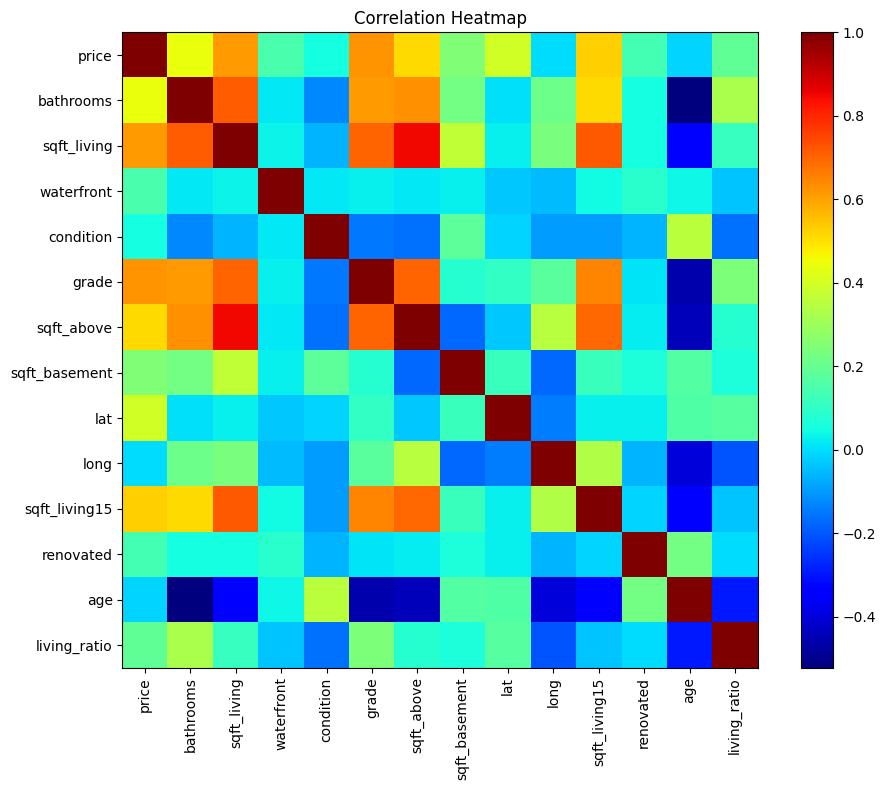

In [117]:
#Correlation heatmap
correlation = house_data_cleaned.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

🔹 Final Data State

After cleaning:

Dataset contains:

20,536 rows

15 numeric features

No missing values

No infinity errors

Model on the train data

We will start building our model using different regression models

 - Feature / Target split (with log price)
    I used np.log1p() to: Shrink large numbers while keeping small ones meaningful, and won`t crash if the value is zero


In [118]:
# X(Independent variables) and y(target variables) 
y = np.log1p(house_data_cleaned["price"])  
X = house_data_cleaned.drop(columns=["price"], errors="ignore")

print("Final feature columns:", X.columns)
print("Number of features:", X.shape[1])

Final feature columns: Index(['bathrooms', 'sqft_living', 'waterfront', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'renovated', 'age', 'living_ratio'],
      dtype='object')
Number of features: 13


- Train-Test Split

80% - training

20% - testing

In [119]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y,
    test_size=0.2,
    random_state=42)

In [120]:
X_train.head()

,bathrooms,sqft_living,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,renovated,age,living_ratio
18308,1.00,750,0.0,3,6,750,0,47.5243,-122.390,1770,0,97,0.187500
15138,2.00,1860,0.0,3,8,1860,0,47.7522,-122.304,1620,1,76,0.204396
17709,2.75,2770,0.0,4,8,1650,1120,47.6496,-122.413,2340,0,56,0.477586
7927,2.00,2350,0.0,3,8,2350,0,47.5830,-122.170,1640,0,38,0.251903
19413,1.00,1240,0.0,3,7,1240,0,47.4971,-122.282,1130,0,48,0.172222


In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

- Training the model

Random Forest:

builds many decision trees,

trains each with random house samples,

uses random feature selections,

averages predictions for stability.

Each tree learns a different view of housing behavior.

In [122]:
# RandomForestRegressors
model = RandomForestRegressor(n_estimators=800,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=4,
    max_features=0.5,
    bootstrap=True,
    random_state=42,
    n_jobs=-1)

model.fit(X_train, y_train)

# Train the model
y_pred_log = model.predict(X_test)



- Predictions

Once trained, the model:

receives unseen houses,

estimates price using learned structure,

produces a final numeric output.

In [123]:
# Convert predictions back to real prices
y_pred = np.expm1(y_pred_log)

# Convert ground truth back to real prices too
y_test_real = np.expm1(y_test)

y_pred = y_pred
y_test_real = y_test_real

# compute metrics
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, y_pred)

print("\nRandomForestRegressor Performance")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


RandomForestRegressor Performance
MSE : 9005166686.630999
RMSE: 94895.55672754651
R²  : 0.8488496696898596


- Evaluation metrics

Mean Squared Error

Root Mean Squared Error

Mean Absolute Error

R² Score

These tellsme:

how far predictions deviate,

how much error occurs on average,

how strongly your model explains price variation.

An R² near 0.85 indicates good performance for house value prediction.

- Freature importance
Each time a feature:

splits data in a tree,

reduces error (variance),

…it earns importance points.

All points are:

summed across trees,

normalized to 1.

In [124]:
from sympy import rf

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
importances = rf.feature_importances_

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df


,Feature,Importance
7,lat,0.434881
1,sqft_living,0.312712
8,long,0.063122
4,grade,0.059071
9,sqft_living15,0.036075
12,living_ratio,0.028904
11,age,0.020104
5,sqft_above,0.017093
2,waterfront,0.007967
0,bathrooms,0.007248


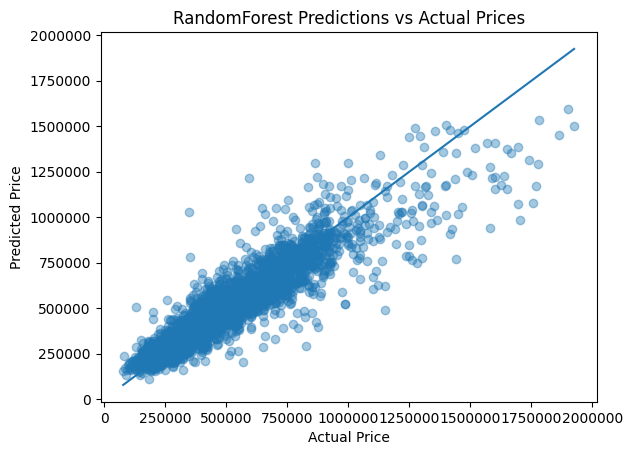

In [125]:
plt.figure()
plt.scatter(y_test_real, y_pred, alpha=0.4)
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("RandomForest Predictions vs Actual Prices")
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()])
plt.show()

. Rsquared cross validation Cross-validation

it confirms model stability.

- how it does it?
Split the dataset into 5 parts (folds).

Then:

Train on 4 parts, test on 1 part. Then it will Rotate test part and repeat until all parts were used as test once

So we get 5 scores.

In [126]:

from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X, y, cv=5, scoring="r2", n_jobs=-1)

print("CV R² scores:", scores)
print("CV Mean R²:", scores.mean())

CV R² scores: [0.8657614  0.85808985 0.86374331 0.86340929 0.86938356]
CV Mean R²: 0.8640774818855187


this is the average house price in my test set., it means on average, the model is off by about 19% of a house price.

In [127]:
print("RMSE / mean price:", rmse / y_test_real.mean())

RMSE / mean price: 0.19374235176018914


- Single-house prediction

In [128]:
sample_house = X_test.iloc[0:1]
predicted_price = np.expm1(model.predict(sample_house))[0]

print("Predicted price:", round(predicted_price, 2))
print("Actual price   :", round(y_test_real.iloc[0], 2))


Predicted price: 406936.29
Actual price   : 538250.0


- Distribution of errors

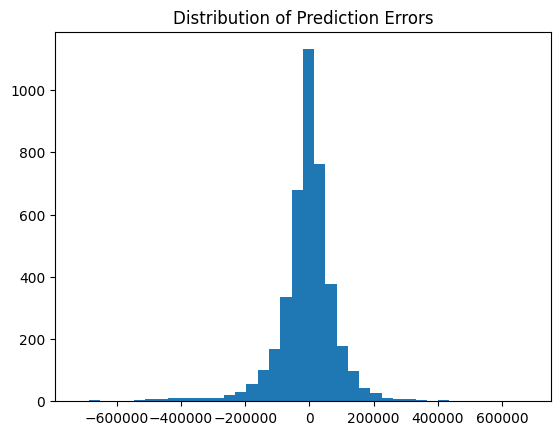

In [129]:
errors = y_pred - y_test_real
plt.hist(errors, bins=40)
plt.title("Distribution of Prediction Errors")
plt.show()